In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

# Step 1: Read an image and convert it to grayscale
original_image = cv2.imread('C://Users//owner//Pictures//Saved Pictures//pexels-pixabay-60597.jpg')
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
gaussian_noises = [np.random.normal(0, sigma, gray_image.shape) for sigma in [10, 20, 30]]
gaussian_noised_images = [np.clip(gray_image + noise, 0, 255).astype(np.uint8) for noise in gaussian_noises]

# Salt and pepper noise
salt_and_pepper_probs = [0.02, 0.05, 0.1]
salt_and_pepper_noised_images = [np.copy(gray_image) for _ in range(3)]



In [20]:
# Step 3: Compare frequency domains
def plot_frequency_domain(image, label):
    f_transform = fftshift(fft2(image))
    magnitude_spectrum = np.log1p(np.abs(f_transform))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis('off')
    plt.title(label)
    plt.colorbar()



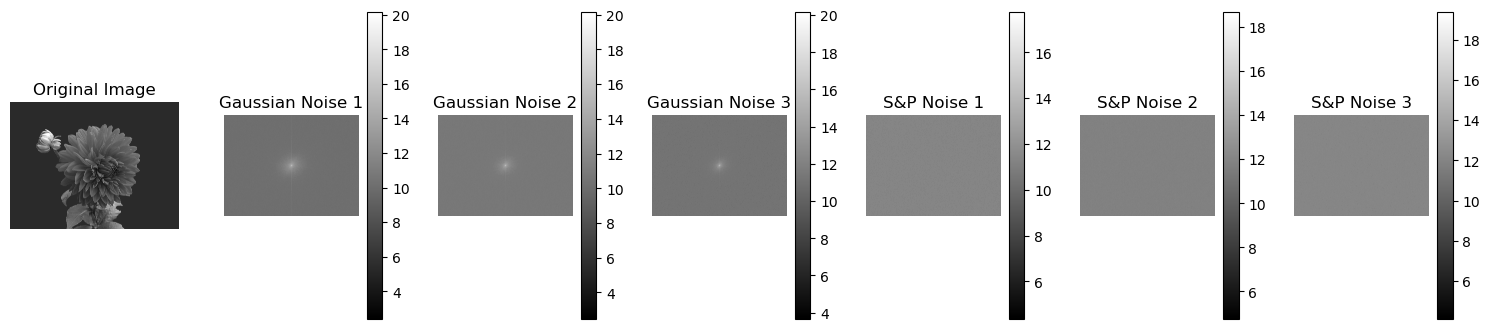

In [21]:
# Step 3: Compare frequency domains in one plot
plt.figure(figsize=(15, 10))

# Plot the original image
plt.subplot(3, 7, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot frequency domains for Gaussian noise images
for i in range(3):
    plt.subplot(3, 7, i + 2)
    plot_frequency_domain(gaussian_noised_images[i], f'Gaussian Noise {i+1}')
    plt.axis('off')

# Plot frequency domains for Salt and Pepper noise images
for i in range(3):
    plt.subplot(3, 7, i + 5)
    plot_frequency_domain(salt_and_pepper_noised_images[i], f'S&P Noise {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


C:\Users\owner\AppData\Local\Temp\ipykernel_13884\1026546470.py:31: RuntimeWarning: divide by zero encountered in log
  spec=np.log(mag) /20


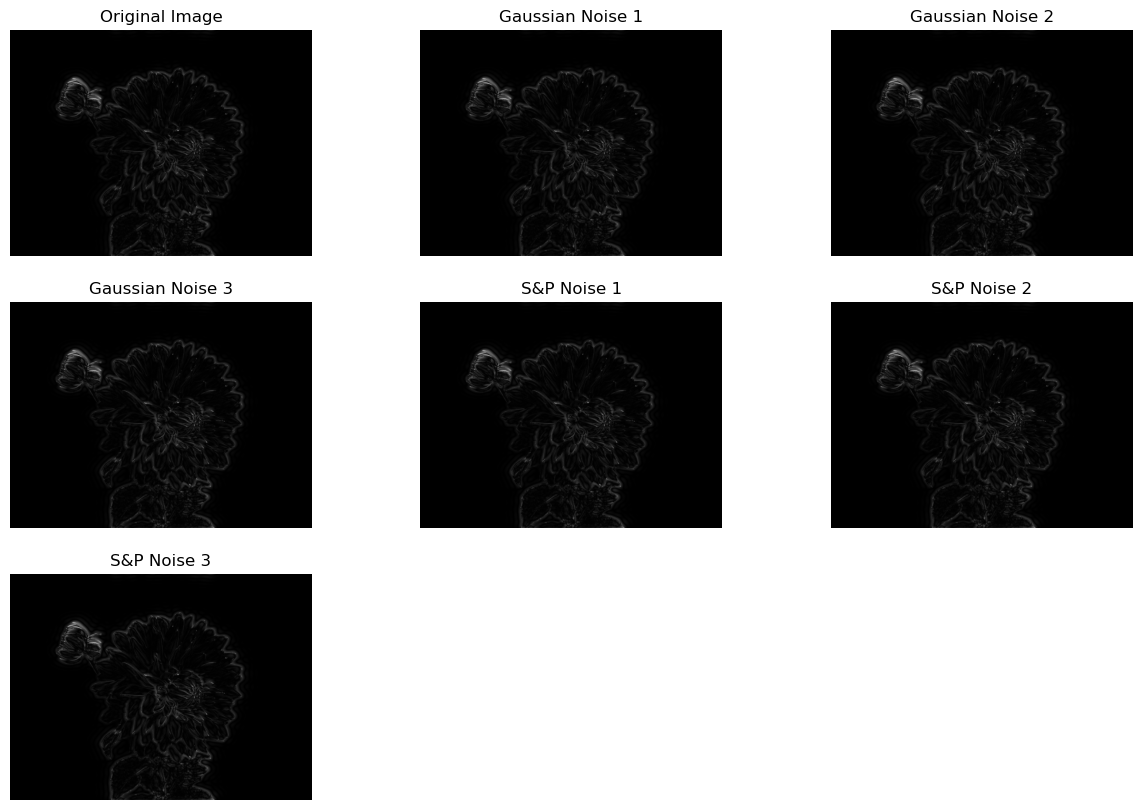

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read an image and convert it to grayscale
image = cv2.imread('C://Users//owner//Pictures//Saved Pictures//pexels-pixabay-60597.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def high_pass_filter(image, cutoff_radius):
    # Step 2: Calculate the Fourier Transform and shift the zero frequency component to the center
    dft = np.fft.fft2(gray_image)
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    spec = np.log(mag) / 20

    # Step 3: Create a circular high-pass filter mask
    rad = 32
    mask = np.zeros_like(gray_image)
    cy = mask.shape[0] // 2
    cx = mask.shape[1] // 2
    cv2.circle(mask, (cx, cy), rad, (255, 255, 255), -1)[0]

    # Invert the mask and apply Gaussian blur
    mask2 = 255 - cv2.GaussianBlur(mask, (19, 19), 0) # to smothen the filter

    # Apply the high-pass filter to the spectrum
    dft_shift_masked = np.multiply(dft_shift, mask) / 255 
    
    dft_shift_masked2 = np.multiply(dft_shift, mask2) / 255
    mag=np.abs(dft_shift_masked2)
    spec=np.log(mag) /20
    # Step 4: Inverse Fourier Transform to get back to the spatial domain
    backed_ishift=np.fft.ifftshift(dft_shift)
    backed_ishift_masked=np.fft.ifftshift(dft_shift_masked)
    backed_ishift_masked2=np.fft.ifftshift(dft_shift_masked2)
    
    img_back = np.fft.ifft2(backed_ishift,axes=(0,1))
    img_filtered = np.fft.ifft2(backed_ishift_masked,axes=(0,1))
    img_filtered2 = np.fft.ifft2(backed_ishift_masked2,axes=(0,1))
    
    img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
    img_filtered =np.abs(img_filtered).clip(0,255).astype(np.uint8)
    img_filtered2 =np.abs(img_filtered2).clip(0,255).astype(np.uint8)
   
    return img_filtered2


cutoff_frequency = 100  # Adjust the cutoff frequency as needed

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1), plt.imshow(high_pass_filter(gray_image, cutoff_frequency), cmap='gray'), plt.title('Original Image')
plt.axis('off')
for i in range(3):
    plt.subplot(3, 3, i + 2), plt.imshow(high_pass_filter(gaussian_noised_images[i], cutoff_frequency), cmap='gray'), plt.title(f'Gaussian Noise {i+1}')
    plt.axis('off')

for i in range(3):
    plt.subplot(3, 3, i + 5), plt.imshow(high_pass_filter(salt_and_pepper_noised_images[i], cutoff_frequency), cmap='gray'), plt.title(f'S&P Noise {i+1}')
    plt.axis('off')

plt.show()
